In [25]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [26]:
#! pip install torchvision

In [27]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'  # matplotlib.pyplot 사용 커널 충돌

In [28]:
mnist_train=datasets.MNIST(root='MNIST_data', 
                           train=True,
                           download=True,
                           transform=transforms.Compose([transforms.ToTensor]))


mnist_test=datasets.MNIST('MNIST_data', 
                           train=False,
                           download=True,
                           transform=transforms.Compose([transforms.ToTensor]))

In [29]:
print(mnist_train)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST_data
    Split: Train
    StandardTransform
Transform: Compose(
               <class 'torchvision.transforms.transforms.ToTensor'>
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: MNIST_data
    Split: Test
    StandardTransform
Transform: Compose(
               <class 'torchvision.transforms.transforms.ToTensor'>
           )


In [30]:
print(mnist_train.data.shape)
print(mnist_train.targets.shape)
print(mnist_test.data.shape)
print(mnist_test.targets.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])
torch.Size([10000])


In [31]:
def plot(x):
    img=(np.array(x.detach(), dtype='float')).reshape(28,28)
    plt.imshow(img, cmap='grey')
    plt.show()

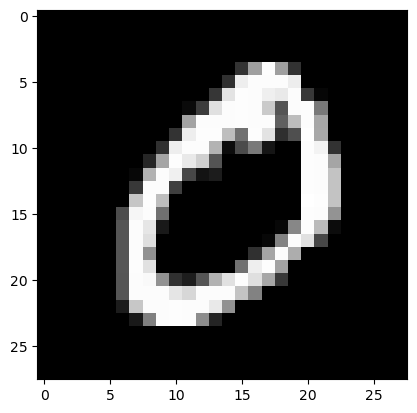

In [32]:
plot(mnist_train.data[1])

In [33]:
mnist_train.data[1]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [34]:
print(mnist_train.targets[10])
print(mnist_train.data.shape)
print(mnist_train.targets.shape)

tensor(3)
torch.Size([60000, 28, 28])
torch.Size([60000])


In [35]:
mnist_train.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [36]:
x=mnist_train.data.float()/255  # 데이터 스케일 조정(0~1 실수로 변경)
# print(x[0])
y=mnist_train.targets
#y[:10]

print(x.size())
print(y.size())
x=x.view(x.size(0), -1)  # 입력데이터 모양 변경(2차원-> 1차원으로 변경)

input_size=x.size(-1)  # 입력데이터 크기
print(input_size)
output_size=int(max(y))+1 # 출력데이터 크기
print(output_size)

torch.Size([60000, 28, 28])
torch.Size([60000])
784
10


In [37]:
# 훈련데이터(train)와 검증데이터(valid)로 분리

ratio=[0.8, 0.2]
train_cnt=int(x.size(0)*ratio[0])
valid_cnt=int(x.size(0)*ratio[1])
test_cnt=len(mnist_test.data)

print(train_cnt, valid_cnt, test_cnt)
cnts=[train_cnt, valid_cnt]

indices=torch.randperm(x.size(0))
x=torch.index_select(x, dim=0, index=indices)
y=torch.index_select(y, dim=0, index=indices)
#plot(x[0])
#y[0]

x1=list(x.split(cnts, dim=0))
y1=list(y.split(cnts, dim=0))
print(x1[0].shape, x1[1].shape)
print(y1[0].shape, y1[1].shape)

x1+=[(mnist_test.data.float()/255).view(test_cnt, -1)]
y1+=[mnist_test.targets]

for ii in x1:
    print(ii.shape)

for yi in y1:
    print(yi.shape)

48000 12000 10000
torch.Size([48000, 784]) torch.Size([12000, 784])
torch.Size([48000]) torch.Size([12000])
torch.Size([48000, 784])
torch.Size([12000, 784])
torch.Size([10000, 784])
torch.Size([48000])
torch.Size([12000])
torch.Size([10000])


In [38]:
model=nn.Sequential(
    nn.Linear(input_size, 500),
    nn.LeakyReLU(),
    nn.Linear(500, 400),
    nn.LeakyReLU(),
    nn.Linear(400, 300),
    nn.LeakyReLU(),
    nn.Linear(300, 200),
    nn.LeakyReLU(),
    nn.Linear(200, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 50),
    nn.LeakyReLU(),
    nn.Linear(50, output_size),
    nn.Softmax(dim=-1)
)
model

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=500, out_features=400, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=400, out_features=300, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=300, out_features=200, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=200, out_features=100, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=100, out_features=50, bias=True)
  (11): LeakyReLU(negative_slope=0.01)
  (12): Linear(in_features=50, out_features=10, bias=True)
  (13): Softmax(dim=-1)
)

In [39]:
crit=nn.CrossEntropyLoss() #
optimizer=optim.Adam(model.parameters())

In [40]:
device=torch.device('cpu')
if torch.cuda.is_available():
    device=torch.device('cuda')

In [41]:
model=model.to(device)
x2=[x_i.to(device) for x_i in x1]
y2=[y_i.to(device) for y_i in y1]

In [42]:
epochs=1000
batch_size=256
print_interval=10

In [43]:
from copy import deepcopy
lowest_loss=np.inf  # 최소 비용값 저장
bast_model=None

early_stop=50
lowest_epoch=np.inf  # 최소 비용값을 가지는 epoch

In [44]:
y2[:10]

[tensor([9, 5, 7,  ..., 4, 0, 8]),
 tensor([1, 7, 8,  ..., 7, 3, 2]),
 tensor([7, 2, 1,  ..., 4, 5, 6])]

In [45]:
train_history, valid_history=[],[]

for i in range(epochs):
    indices=torch.randperm(x2[0].size(0)).to(device)
    x_=torch.index_select(x2[0], dim=0, index=indices)
    y_=torch.index_select(y2[0], dim=0, index=indices)

    x_=x_.split(batch_size, dim=0)
    y_=y_.split(batch_size, dim=0)
    #print(x_[0].shape)
    #print(y_[0].shape)

    train_loss, valid_loss=0,0
    y_hat=[]

    for x_i, y_i in zip(x_, y_):
        y_hat_i=model(x_i)
        loss=crit(y_hat_i, y_i.squeeze())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss+=float(loss)
    
    train_loss=train_loss/len(x_) # len(x_)=train_loss/256

    with torch.no_grad(): #기울기 미분을 하지 않는 다는 뜻
        x_=x2[1].split(batch_size, dim=0)
        y_=y2[1].split(batch_size, dim=0)
        valid_loss=0

        for x_i, y_i in zip(x_, y_):
            y_hat_i=model(x_i)
            loss=crit(y_hat_i, y_i)
            valid_loss+=float(loss)

            y_hat+=[y_hat_i]

    valid_loss=valid_loss/len(x_i)

    train_history+=[train_loss]
    valid_history+=[valid_loss]

    if (i+1) % print_interval==0:
        print(i, train_loss, valid_loss, lowest_loss)

    if valid_loss <=lowest_loss:
        lowest_loss=valid_loss
        lowest_epoch=i
        best_model=deepcopy(model.state_dict)
    else:
        if early_stop >0 and lowest_epoch+early_stop < i+1:
            print('%d 이후 %d epoch 증가하는 동안 손실함수 감소가 없음'%(lowest_epoch, early_stop))
            break

print('epoch %d일때 손실함수 %.4f가 검증 데이터로 가장 낮는 손실함수를 가짐'%(lowest_epoch, lowest_loss))

9 1.4942439984767995 0.31429306737014223 0.31537545525601934
19 1.4963463418027187 0.315455757613693 0.31429306737014223
29 1.506649594991765 0.31830763976488796 0.31429306737014223
39 1.5087648833051641 0.3194109025810446 0.31429306737014223
49 1.5130706879686802 0.3187040500342846 0.31429306737014223
59 1.541618583684272 0.3213129650269236 0.31429306737014223
9 이후 50 epoch 증가하는 동안 손실함수 감소가 없음
epoch 9일때 손실함수 0.3143가 검증 데이터로 가장 낮는 손실함수를 가짐


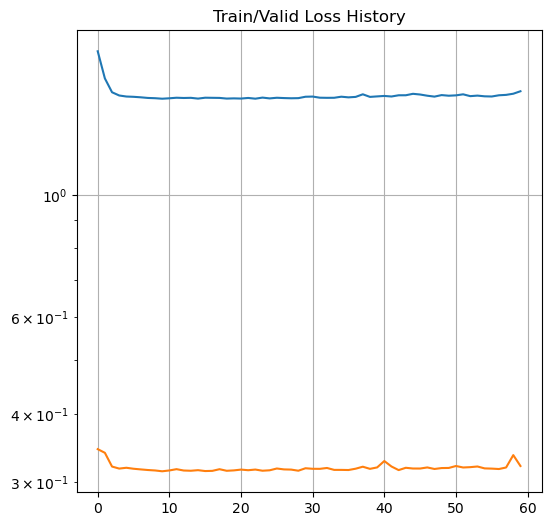

In [46]:
plot_from=0
plt.figure(figsize=(6,6))
plt.grid(True)
plt.title('Train/Valid Loss History')
plt.plot(range(plot_from, len(train_history)), train_history[plot_from:],
         range(plot_from, len(valid_history)), valid_history[plot_from:])
plt.yscale('log')
plt.show()

In [47]:
test_loss=0
y_hat=[]

with torch.no_grad():
    x_=x2[-1].split(batch_size, dim=0) 
    y_=y2[-1].split(batch_size, dim=0)

    for x_i, y_i in zip(x_, y_):
        y_hat_i=model(x_i)
        loss=crit(y_hat_i, y_i.squeeze())

        test_loss+=loss
        y_hat+=[y_hat_i]

test_loss=test_loss/len(x_)
y_hat=torch.cat(y_hat,dim=0)
print('test loss:', test_loss)

test loss: tensor(1.5290)


In [48]:
y_hat

tensor([[0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [50]:
correct_cnt=(y2[-1].squeeze()==torch.argmax(y_hat, dim=-1)).sum()

print(correct_cnt/10000)

tensor(0.9320)


In [51]:
import pandas as pd
from sklearn.metrics import confusion_matrix

df=pd.DataFrame(confusion_matrix(y2[-1], torch.argmax(y_hat, dim=-1)),
                index=['true_%d'%i for i in range(10)],
                columns=['pred_%d'%i for i in range(10)])
df

,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9
true_0,963,0,6,2,0,1,7,1,0,0
true_1,0,1113,11,1,0,1,1,4,4,0
true_2,5,0,993,2,2,0,9,14,7,0
true_3,2,0,65,916,0,7,0,11,8,1
true_4,1,0,11,0,917,0,18,10,5,20
true_5,24,0,8,84,1,740,23,6,4,2
true_6,13,3,6,1,2,2,922,0,9,0
true_7,2,5,24,0,3,0,0,989,1,4
true_8,19,0,58,14,3,13,5,6,854,2
true_9,9,7,1,15,13,9,3,20,19,913
